In [1]:

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
import pandas as pd
import numpy as np
import os
import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
cwd = os.getcwd()
myWkdk=cwd+"\\dati-regioni\\"
myFilesInOneList=os.listdir(myWkdk)
l=[]
for myFilesToOpen in range (0, len(myFilesInOneList)):
    Dati=pd.read_csv(myWkdk+myFilesInOneList[myFilesToOpen])
    l.append(Dati)
CasiNcovReg=pd.concat(l, axis=0)
CasiNcovReg['data'] = pd.to_datetime(CasiNcovReg['data']).dt.normalize()

In [4]:
#CasiNcovReg.shape

In [5]:
#CasiNcovReg.columns

In [6]:
#CasiNcovReg[-1:]

In [7]:
#CasiNcovReg['TamponiOverCasi']=CasiNcovReg['tamponi']/CasiNcovReg['totale_casi']

# Tabella con i principali indicatori: Dati Aggregati

In [8]:
DataGroupedTot=CasiNcovReg[['data','totale_casi','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_attualmente_positivi', 'nuovi_attualmente_positivi',
       'dimessi_guariti', 'deceduti', 'tamponi']].groupby('data').sum()
DataGroupedTot[:29]

,totale_casi,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,tamponi
data,,,,,,,,,,
2020-02-24,229,101,26,127,94,221,221,1,7,4324
2020-02-25,322,114,35,150,162,311,90,1,10,8623
2020-02-26,400,128,36,164,221,385,74,3,12,9587
2020-02-27,650,248,56,304,284,588,203,45,17,12014
2020-02-28,888,345,64,409,412,821,233,46,21,15695
2020-02-29,1128,401,105,506,543,1049,228,50,29,18661
2020-03-01,1694,639,140,779,798,1577,528,83,34,21127
2020-03-02,2036,742,166,908,927,1835,258,149,52,23345
2020-03-03,2502,1034,229,1263,1000,2263,428,160,79,25856


In [9]:
l=[DataGroupedTot['deceduti'][0]]
l1=[DataGroupedTot['dimessi_guariti'][0]]
l2=[DataGroupedTot['totale_ospedalizzati'][0]]
l3=[DataGroupedTot['terapia_intensiva'][0]]
l4=[DataGroupedTot['tamponi'][0]]
l5=[DataGroupedTot['totale_casi'][0]]
for i in range(0,len(DataGroupedTot)-1):
    l.append(DataGroupedTot['deceduti'][i+1]-DataGroupedTot['deceduti'][i]) #Contiene variazione deceduti
    l1.append(DataGroupedTot['dimessi_guariti'][i+1]-DataGroupedTot['dimessi_guariti'][i])#Contiene variazione dimessi guariti
    l2.append(DataGroupedTot['totale_ospedalizzati'][i+1]-DataGroupedTot['totale_ospedalizzati'][i])#Contiene variazione ospedalizzati
    l3.append(DataGroupedTot['terapia_intensiva'][i+1]-DataGroupedTot['terapia_intensiva'][i])#Contiene variazione terapia intensiva
    l4.append(DataGroupedTot['tamponi'][i+1]-DataGroupedTot['tamponi'][i])#Contiene variazione Tamponi
    l5.append(DataGroupedTot['totale_casi'][i+1]-DataGroupedTot['totale_casi'][i])#Contiene variazione Tamponi
    

In [10]:
DataGroupedTot['Variazione_deceduti']=l
DataGroupedTot['Variazione_dimessi Guariti']=l1
DataGroupedTot['Variazione_totale Ospedalizzati']=l2
DataGroupedTot['Variazione_totale Terapia Intensiva']=l3
DataGroupedTot['Variazione_totale Tamponi']=l4
DataGroupedTot['Variazione_totale Casi']=l5


In [11]:
dateTime=DataGroupedTot.index

In [12]:
#DataGroupedTot['totale_casi'].values

# Evoluzione del totale dei casi denunciati

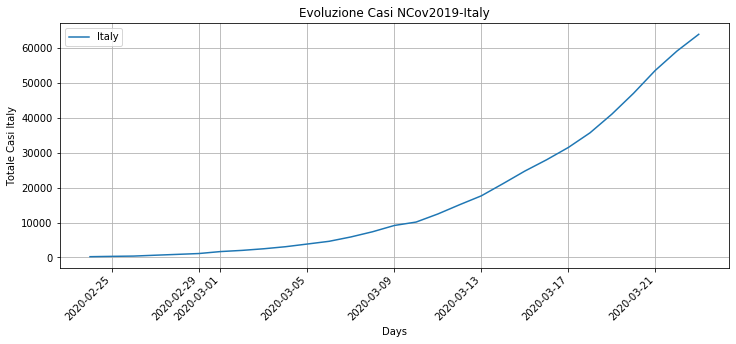

In [26]:
#plt.figure(figsize=(10,5)) 
plt.figure(figsize=(12,4.5))
plt.plot(dateTime,DataGroupedTot['totale_casi'].values) #Value for Totale Casi
label_it = 'Italy'
plt.ylabel('Totale Casi Italy')
plt.xlabel('Days')
plt.title('Evoluzione Casi NCov2019-Italy')
plt.legend([label_it])
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.grid(True)
plt.show()

# Evoluzione del totale dei casi denunciati vs Totale Ospedalizzati vs Totale Ter. Intensiva

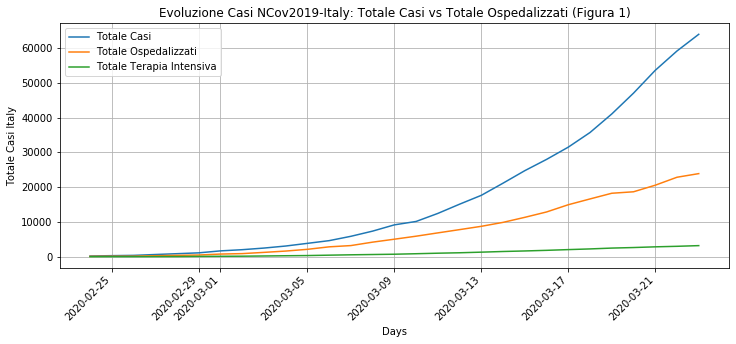

In [14]:
#plt.figure(figsize=(10,5)) 
plt.figure(figsize=(12,4.5))
plt.plot(dateTime,DataGroupedTot['totale_casi'].values) #Value for Totale Casi
#plt.plot(dateTime,DataGroupedTot['ricoverati_con_sintomi'].values) #Value for ricoverati_con_sintomi
plt.plot(dateTime,DataGroupedTot['totale_ospedalizzati'].values) #Value for Totale Ospedalizzati
plt.plot(dateTime,DataGroupedTot['terapia_intensiva'].values) #Value for Totale Terapia Intensiva
#plt.plot(dateTime,DataGroupedTot['isolamento_domiciliare'].values) #Value for Totale isolamento_domiciliare
#plt.plot(dateTime,DataGroupedTot['totale_attualmente_positivi'].values) #Value for Totale totale_attualmente_positivi
#plt.plot(dateTime,DataGroupedTot['nuovi_attualmente_positivi'].values) #Value for Totale nuovi_attualmente_positivi
#plt.plot(dateTime,DataGroupedTot['dimessi_guariti'].values) #Value for Totale dimessi_guariti
#plt.plot(dateTime,DataGroupedTot['deceduti'].values) #Value for Totale deceduti
#plt.plot(dateTime,DataGroupedTot['tamponi'].values) #Value for Totale tamponi
label_TotCasi = 'Totale Casi'
label_TotOspedalizzati = 'Totale Ospedalizzati'
label_TotTerapiaIntensiva = 'Totale Terapia Intensiva'
plt.ylabel('Totale Casi Italy')
plt.xlabel('Days')
plt.title('Evoluzione Casi NCov2019-Italy: Totale Casi vs Totale Ospedalizzati (Figura 1)')
plt.legend([label_TotCasi,label_TotOspedalizzati,label_TotTerapiaIntensiva])
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.grid(True)
plt.show()

# Totale Casi vs Totale Tamponi

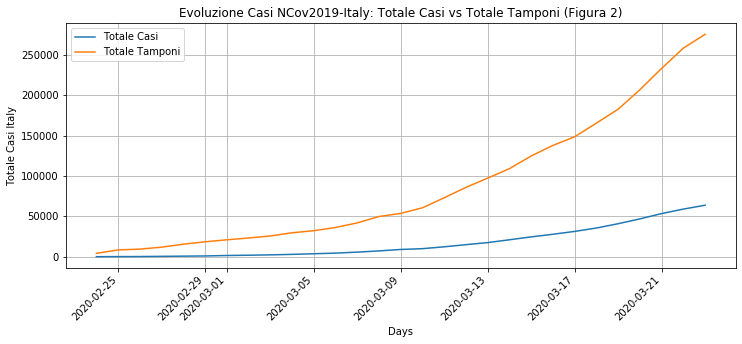

In [15]:
#plt.figure(figsize=(10,5)) 
plt.figure(figsize=(12,4.5))
plt.plot(dateTime,DataGroupedTot['totale_casi'].values) #Value for Totale Casi
#plt.plot(dateTime,DataGroupedTot['ricoverati_con_sintomi'].values) #Value for ricoverati_con_sintomi
#plt.plot(dateTime,DataGroupedTot['totale_ospedalizzati'].values) #Value for Totale Ospedalizzati
#plt.plot(dateTime,DataGroupedTot['terapia_intensiva'].values) #Value for Totale Terapia Intensiva
#plt.plot(dateTime,DataGroupedTot['isolamento_domiciliare'].values) #Value for Totale isolamento_domiciliare
#plt.plot(dateTime,DataGroupedTot['totale_attualmente_positivi'].values) #Value for Totale totale_attualmente_positivi
#plt.plot(dateTime,DataGroupedTot['nuovi_attualmente_positivi'].values) #Value for Totale nuovi_attualmente_positivi
#plt.plot(dateTime,DataGroupedTot['dimessi_guariti'].values) #Value for Totale dimessi_guariti
#plt.plot(dateTime,DataGroupedTot['deceduti'].values) #Value for Totale deceduti
plt.plot(dateTime,(DataGroupedTot['tamponi'].values)) #Value for Totale tamponi
label_TotCasi = 'Totale Casi'
label_TotTamp = 'Totale Tamponi'
plt.ylabel('Totale Casi Italy')
plt.xlabel('Days')
plt.title('Evoluzione Casi NCov2019-Italy: Totale Casi vs Totale Tamponi (Figura 2)')
plt.legend([label_TotCasi,label_TotTamp])
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.grid(True)
plt.show()

# Plot con alcune metriche rilevanti
### Nelle figure che seguono a sx viene esposto il valore totale, a dx la variazione giornaliera

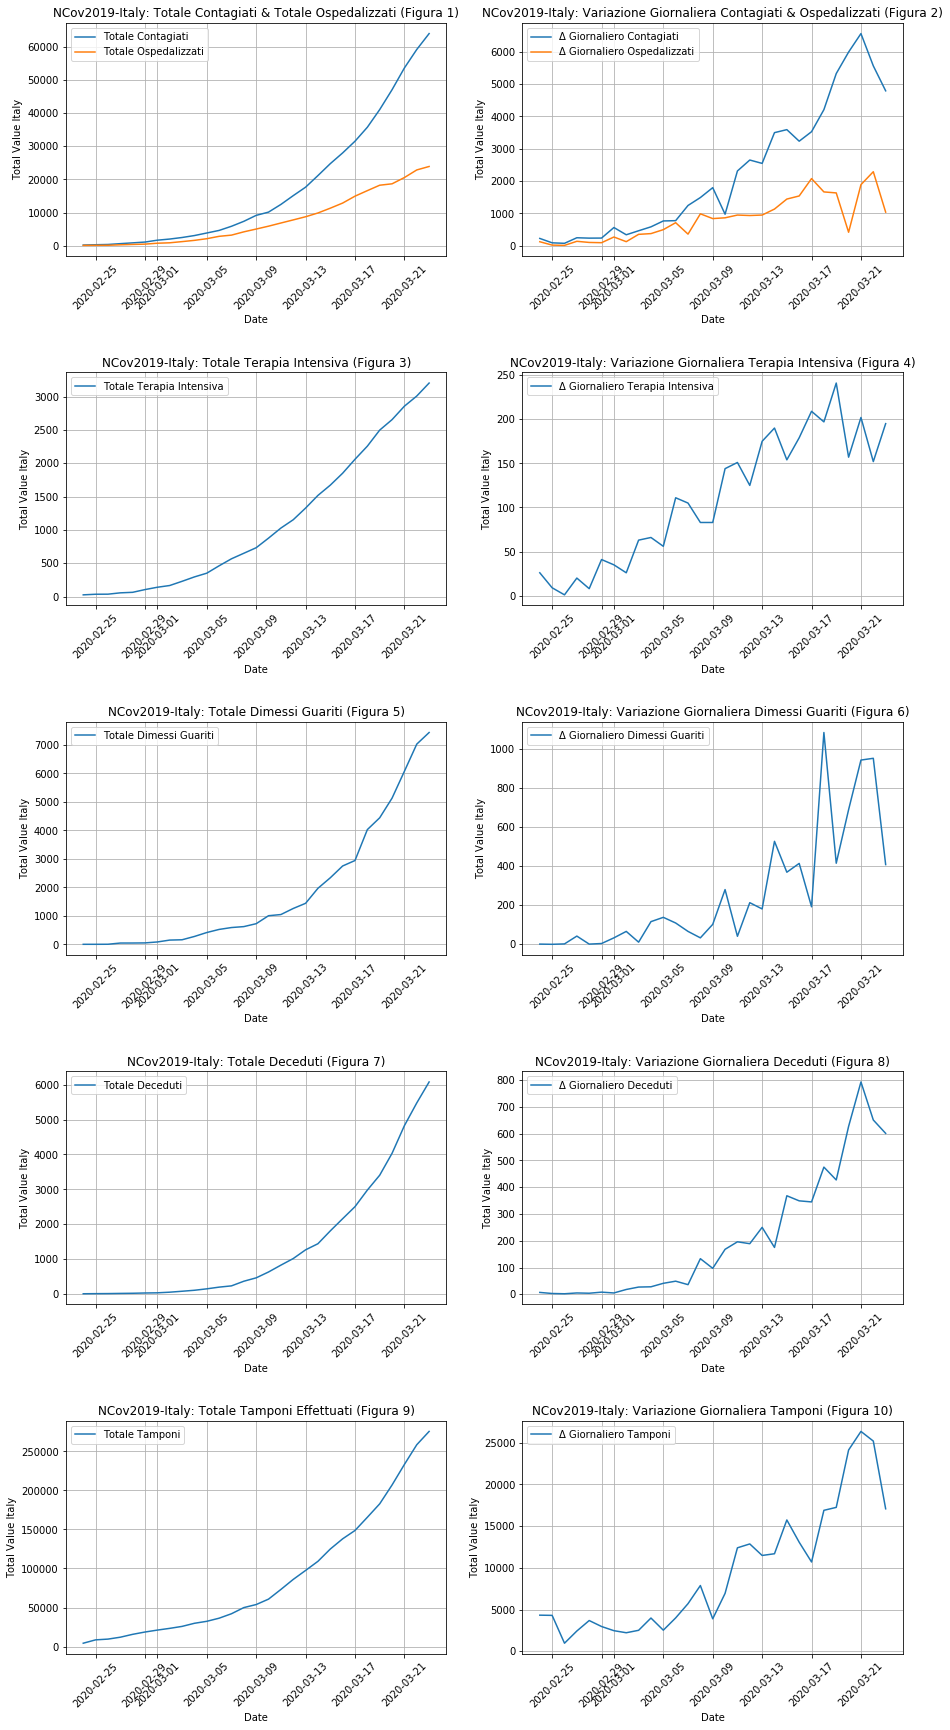

In [16]:
fig, ((ax1,ax2), (ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))=plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15,30)
label_TotCasi = 'Totale Contagiati'
label_TotOspedalizzati = 'Totale Ospedalizzati'
label_TotaleNuoviCasi='Totale Nuovi Casi'
label_TotaleDeceduti='Totale Deceduti'
label_TotaleTerIntensiva='Totale Terapia Intensiva'
label_TotaleTamponi='Totale Tamponi'
label_TotaleDimessiGuariti='Totale Dimessi Guariti'

label_D_Contagiati='Δ Giornaliero Contagiati'
label_D_Ospedalizzati='Δ Giornaliero Ospedalizzati'
label_D_DimessiGuariti='Δ Giornaliero Dimessi Guariti'
label_D_Deceduti='Δ Giornaliero Deceduti'
label_D_TerapiaIntensiva='Δ Giornaliero Terapia Intensiva'
label_D_Tamponi='Δ Giornaliero Tamponi'


# Axis1
ax1.set_title('NCov2019-Italy: Totale Contagiati & Totale Ospedalizzati (Figura 1)')
ax1.set_ylabel('Total Value Italy')
ax1.set_xlabel('Date')
ax1.plot(dateTime,DataGroupedTot['totale_casi'].values) #Value for Totale Casi
ax1.plot(dateTime,DataGroupedTot['totale_ospedalizzati'].values) #Value for Totale Casi

ax1.legend([label_TotCasi,label_TotOspedalizzati])
ax1.grid(True)
plt.setp(ax1.get_xticklabels(), rotation=45)

# Axis2
ax2.set_title('NCov2019-Italy: Variazione Giornaliera Contagiati & Ospedalizzati (Figura 2)')
ax2.set_ylabel('Total Value Italy')
ax2.set_xlabel('Date')
ax2.plot(dateTime,DataGroupedTot['Variazione_totale Casi'].values) #Value for Totale Ospedalizzati
ax2.plot(dateTime,DataGroupedTot['Variazione_totale Ospedalizzati'].values) #Value for Totale Ospedalizzati
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.grid(True)
ax2.legend([label_D_Contagiati,label_D_Ospedalizzati])

# Axis3
ax3.set_title('NCov2019-Italy: Totale Terapia Intensiva (Figura 3)')
ax3.set_ylabel('Total Value Italy')
ax3.set_xlabel('Date')
ax3.plot(dateTime,DataGroupedTot['terapia_intensiva'].values) #Value for Totale Ospedalizzati
plt.setp(ax3.get_xticklabels(), rotation=45)
ax3.grid(True)
ax3.legend([label_TotaleTerIntensiva])

# Axis4
ax4.set_title('NCov2019-Italy: Variazione Giornaliera Terapia Intensiva (Figura 4)')
ax4.set_ylabel('Total Value Italy')
ax4.set_xlabel('Date')
ax4.plot(dateTime,DataGroupedTot['Variazione_totale Terapia Intensiva'].values) 
plt.setp(ax4.get_xticklabels(), rotation=45)
ax4.grid(True)
ax4.legend([label_D_TerapiaIntensiva])

# Axis5
ax5.set_title('NCov2019-Italy: Totale Dimessi Guariti (Figura 5)')
ax5.set_ylabel('Total Value Italy')
ax5.set_xlabel('Date')
ax5.plot(dateTime,DataGroupedTot['dimessi_guariti'].values) #Value for Totale Ospedalizzati
plt.setp(ax5.get_xticklabels(), rotation=45)
ax5.grid(True)
ax5.legend([label_TotaleDimessiGuariti])

# Axis6
ax6.set_title('NCov2019-Italy: Variazione Giornaliera Dimessi Guariti (Figura 6)')
ax6.set_ylabel('Total Value Italy')
ax6.set_xlabel('Date')
ax6.plot(dateTime,DataGroupedTot['Variazione_dimessi Guariti'].values) 
plt.setp(ax6.get_xticklabels(), rotation=45)
ax6.grid(True)
ax6.legend([label_D_DimessiGuariti])

# Axis7
ax7.set_title('NCov2019-Italy: Totale Deceduti (Figura 7)')
ax7.set_ylabel('Total Value Italy')
ax7.set_xlabel('Date')
ax7.plot(dateTime,DataGroupedTot['deceduti'].values) #Value for Totale Ospedalizzati
plt.setp(ax7.get_xticklabels(), rotation=45)
ax7.grid(True)
ax7.legend([label_TotaleDeceduti])

# Axis8
ax8.set_title('NCov2019-Italy: Variazione Giornaliera Deceduti (Figura 8)')
ax8.set_ylabel('Total Value Italy')
ax8.set_xlabel('Date')
ax8.plot(dateTime,DataGroupedTot['Variazione_deceduti'].values) #Value for Totale Ospedalizzati
plt.setp(ax8.get_xticklabels(), rotation=45)
ax8.grid(True)
ax8.legend([label_D_Deceduti])


# Axis9
ax9.set_title('NCov2019-Italy: Totale Tamponi Effettuati (Figura 9)')
ax9.set_ylabel('Total Value Italy')
ax9.set_xlabel('Date')
ax9.plot(dateTime,DataGroupedTot['tamponi'].values) #Value for Totale Ospedalizzati
plt.setp(ax9.get_xticklabels(), rotation=45)
ax9.grid(True)
ax9.legend([label_TotaleTamponi])

# Axis10
ax10.set_title('NCov2019-Italy: Variazione Giornaliera Tamponi (Figura 10)')
ax10.set_ylabel('Total Value Italy')
ax10.set_xlabel('Date')
ax10.plot(dateTime,DataGroupedTot['Variazione_totale Tamponi'].values) #Value for Totale Ospedalizzati
plt.setp(ax10.get_xticklabels(), rotation=45)
ax10.grid(True)
ax10.legend([label_D_Tamponi])


fig.subplots_adjust(wspace=0.2) #spazio tra i 2 grafici
fig.subplots_adjust(hspace=0.5)
#fig.set_size_inches(20,5) dimensione dei due grafici
plt.show()

# Dati per Regioni: Main Indicators

In [17]:
ListaRegioni=[]
for elem in CasiNcovReg['denominazione_regione']:
    if elem not in ListaRegioni:
        ListaRegioni.append(elem)

#ListaRegioni[:0]

In [18]:
DataGroupedReg=CasiNcovReg[['data','denominazione_regione','totale_casi','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_attualmente_positivi', 'nuovi_attualmente_positivi',
       'dimessi_guariti', 'deceduti', 'tamponi']].groupby(['denominazione_regione','data'],as_index=False).sum ()
#DataGroupedReg[:1]

In [19]:
l10=[DataGroupedReg['deceduti'][0]]
l11=[DataGroupedReg['dimessi_guariti'][0]]
l12=[DataGroupedReg['totale_ospedalizzati'][0]]
l13=[DataGroupedReg['terapia_intensiva'][0]]
l14=[DataGroupedReg['tamponi'][0]]
l15=[DataGroupedReg['totale_casi'][0]]

for i in range(0,len(DataGroupedReg)-1):
    l10.append(DataGroupedReg['deceduti'][i+1]-DataGroupedReg['deceduti'][i]) #Contiene variazione deceduti
    l11.append(DataGroupedReg['dimessi_guariti'][i+1]-DataGroupedReg['dimessi_guariti'][i])#Contiene variazione dimessi guariti
    l12.append(DataGroupedReg['totale_ospedalizzati'][i+1]-DataGroupedReg['totale_ospedalizzati'][i])#Contiene variazione ospedalizzati
    l13.append(DataGroupedReg['terapia_intensiva'][i+1]-DataGroupedReg['terapia_intensiva'][i])#Contiene variazione terapia intensiva
    l14.append(DataGroupedReg['tamponi'][i+1]-DataGroupedReg['tamponi'][i])#Contiene variazione Tamponi
    l15.append(DataGroupedReg['totale_casi'][i+1]-DataGroupedReg['totale_casi'][i])#Contiene variazione Tamponi
    
DataGroupedReg['Variazione_deceduti']=l10
DataGroupedReg['Variazione_dimessi Guariti']=l11
DataGroupedReg['Variazione_totale Ospedalizzati']=l12
DataGroupedReg['Variazione_totale Terapia Intensiva']=l13
DataGroupedReg['Variazione_totale Tamponi']=l14
DataGroupedReg['Variazione_totale Casi']=l15

In [20]:
conditions=[DataGroupedReg['data']=='2020-02-24',DataGroupedReg['data']!='2020-02-24']
choices=[DataGroupedReg['deceduti'], DataGroupedReg['Variazione_deceduti']]
DataGroupedReg['Variazione_deceduti']=np.select(conditions, choices, default=np.nan)

conditions=[DataGroupedReg['data']=='2020-02-24',DataGroupedReg['data']!='2020-02-24']
choices=[DataGroupedReg['dimessi_guariti'], DataGroupedReg['Variazione_dimessi Guariti']]
DataGroupedReg['Variazione_dimessi Guariti']=np.select(conditions, choices, default=np.nan)

conditions=[DataGroupedReg['data']=='2020-02-24',DataGroupedReg['data']!='2020-02-24']
choices=[DataGroupedReg['totale_ospedalizzati'], DataGroupedReg['Variazione_totale Ospedalizzati']]
DataGroupedReg['Variazione_totale Ospedalizzati']=np.select(conditions, choices, default=np.nan)

conditions=[DataGroupedReg['data']=='2020-02-24',DataGroupedReg['data']!='2020-02-24']
choices=[DataGroupedReg['terapia_intensiva'], DataGroupedReg['Variazione_totale Terapia Intensiva']]
DataGroupedReg['Variazione_totale Terapia Intensiva']=np.select(conditions, choices, default=np.nan)

conditions=[DataGroupedReg['data']=='2020-02-24',DataGroupedReg['data']!='2020-02-24']
choices=[DataGroupedReg['tamponi'], DataGroupedReg['Variazione_totale Tamponi']]
DataGroupedReg['Variazione_totale Tamponi']=np.select(conditions, choices, default=np.nan)

conditions=[DataGroupedReg['data']=='2020-02-24',DataGroupedReg['data']!='2020-02-24']
choices=[DataGroupedReg['totale_casi'], DataGroupedReg['Variazione_totale Casi']]
DataGroupedReg['Variazione_totale Casi']=np.select(conditions, choices, default=np.nan)

In [21]:
DataGroupedReg['TamponiOverCasi']=DataGroupedReg['tamponi']/DataGroupedReg['totale_casi']

In [22]:
#DataGroupedReg.columns

In [23]:
#DataGroupedReg[DataGroupedReg['denominazione_regione']=='Lombardia'][:0]

In [24]:
#### Codice con ciclo for

Le regioni che verrano plottate sono le seguenti: 
Abruzzo
Basilicata
P.A. Bolzano
Calabria
Campania
Emilia Romagna
Friuli Venezia Giulia
Lazio
Liguria
Lombardia
Marche
Molise
Piemonte
Puglia
Sardegna
Sicilia
Toscana
P.A. Trento
Umbria
Valle d'Aosta
Veneto


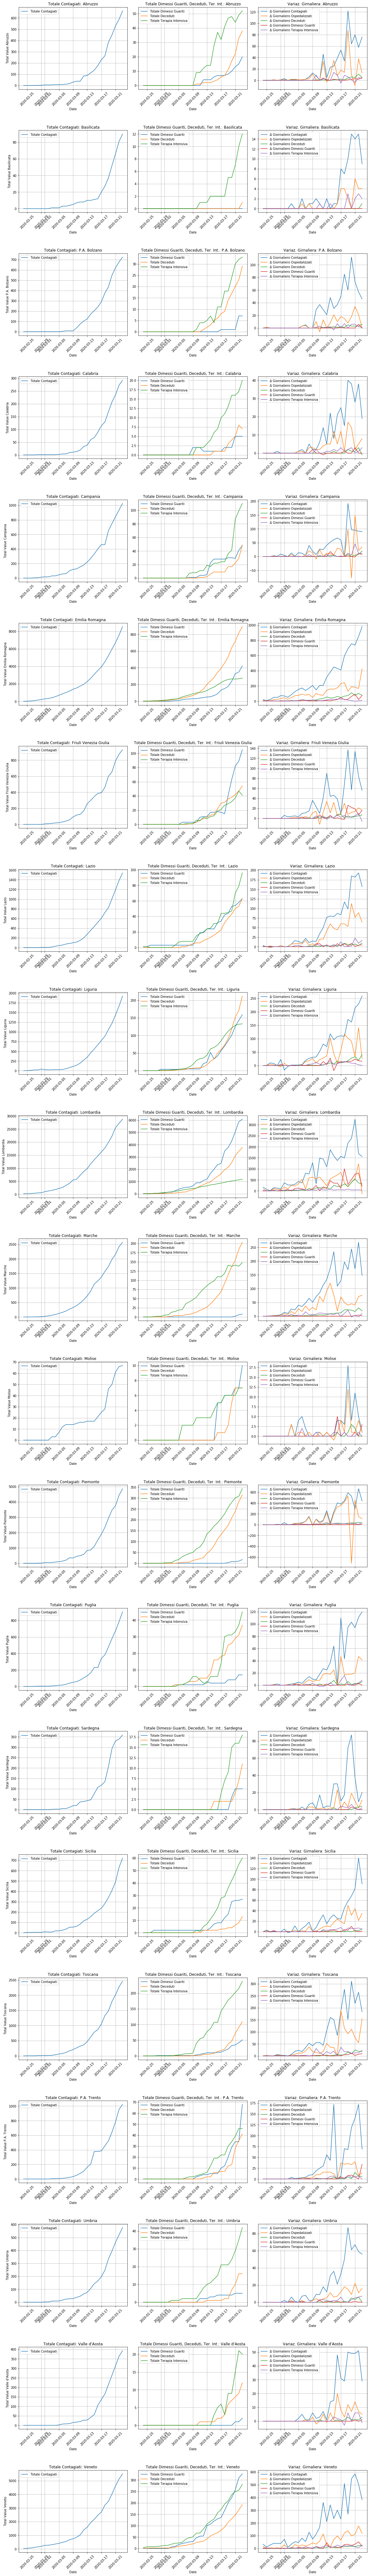

In [25]:
fig2, ax=plt.subplots()
fig2.set_size_inches(20,150)
label_TotCasi = 'Totale Contagiati'
label_TotOspedalizzati = 'Totale Ospedalizzati'
label_TotaleNuoviCasi='Totale Nuovi Casi'
label_TotaleDeceduti='Totale Deceduti'
label_TotaleTerIntensiva='Totale Terapia Intensiva'
label_TotaleTamponi='Totale Tamponi'
label_TotaleDimessiGuariti='Totale Dimessi Guariti'

label_D_Contagiati='Δ Giornaliero Contagiati'
label_D_Ospedalizzati='Δ Giornaliero Ospedalizzati'
label_D_DimessiGuariti='Δ Giornaliero Dimessi Guariti'
label_D_Deceduti='Δ Giornaliero Deceduti'
label_D_TerapiaIntensiva='Δ Giornaliero Terapia Intensiva'
label_D_Tamponi='Δ Giornaliero Tamponi'

nColumn = 3
ax = []
print('Le regioni che verrano plottate sono le seguenti: ')

j=0
for i in range(1,len(ListaRegioni)*nColumn, nColumn):
    print(ListaRegioni[j])
    ax1 = plt.subplot(len(ListaRegioni),nColumn,i)
    ax1.set_title('Totale Contagiati: '+ ListaRegioni[j])
    ax1.set_ylabel('Total Value ' + ListaRegioni[j])
    ax1.set_xlabel('Date')
    ax1.plot(dateTime,CasiNcovReg[CasiNcovReg['denominazione_regione']==ListaRegioni[j]]['totale_casi'].values) #Value for Totale Casi
    ax1.legend([label_TotCasi,label_TotOspedalizzati])
    ax1.grid(True)
    plt.setp(ax1.get_xticklabels(), rotation=45)

# Axis2
    ax2 = plt.subplot(len(ListaRegioni),nColumn,i+1)
    ax2.set_title('Totale Dimessi Guariti, Deceduti, Ter. Int.: '+ ListaRegioni[j])
#    ax2.set_ylabel('Total Value ' + ListaRegioni[j])
    ax2.set_xlabel('Date')
    ax2.plot(dateTime,CasiNcovReg[CasiNcovReg['denominazione_regione']==ListaRegioni[j]]['dimessi_guariti'].values) #Value for Totale Casi
    ax2.plot(dateTime,CasiNcovReg[CasiNcovReg['denominazione_regione']==ListaRegioni[j]]['deceduti'].values) #Value for Totale Deceduti
    ax2.plot(dateTime,CasiNcovReg[CasiNcovReg['denominazione_regione']==ListaRegioni[j]]['terapia_intensiva'].values) #Value for Totale Terapia Intensiva
    plt.setp(ax2.get_xticklabels(), rotation=45)
    ax2.grid(True)
    ax2.legend([label_TotaleDimessiGuariti,label_TotaleDeceduti,label_TotaleTerIntensiva])
#    ax.append((ax1,ax2))

    ax3 = plt.subplot(len(ListaRegioni),nColumn,i+2)
    ax3.set_title('Variaz. Girnaliera: '+ ListaRegioni[j])
#    ax3.set_ylabel('Total Value ' + ListaRegioni[j])
    ax3.set_xlabel('Date')

    ax3.plot(dateTime,DataGroupedReg[DataGroupedReg['denominazione_regione']==ListaRegioni[j]]['Variazione_totale Casi'].values) #Value for Totale Casi
    ax3.plot(dateTime,DataGroupedReg[DataGroupedReg['denominazione_regione']==ListaRegioni[j]]['Variazione_totale Ospedalizzati'].values) #Value for Totale Casi
    ax3.plot(dateTime,DataGroupedReg[DataGroupedReg['denominazione_regione']==ListaRegioni[j]]['Variazione_deceduti'].values) #Value for Totale Casi
    ax3.plot(dateTime,DataGroupedReg[DataGroupedReg['denominazione_regione']==ListaRegioni[j]]['Variazione_dimessi Guariti'].values) #Value for Totale Casi    
    ax3.plot(dateTime,DataGroupedReg[DataGroupedReg['denominazione_regione']==ListaRegioni[j]]['Variazione_totale Terapia Intensiva'].values) #Value for Totale Casi
    #ax3.plot(dateTime,DataGroupedReg[DataGroupedReg['denominazione_regione']==ListaRegioni[j]]['Variazione_totale Tamponi'].values) #Value for Totale Casi

    
    ax3.legend([label_D_Contagiati,label_D_Ospedalizzati,label_D_Deceduti,label_D_DimessiGuariti,label_D_TerapiaIntensiva])

    
    ax3.grid(True)
    plt.setp(ax3.get_xticklabels(), rotation=45)
    
    j=j+1
    


fig2.subplots_adjust(wspace=0.1) #spazio tra i 2 grafici
fig2.subplots_adjust(hspace=0.5)
#fig2.set_size_inches(20,5) dimensione dei due grafici
plt.show()